In [5]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor

# Create the data dictionary
data = {
    'age': [23, 25, 27, 29, 29],
    'likes english': [0, 1, 1, 0, 0],
    'likes ai': [0, 1, 0, 1, 0],
    'salary': [200, 400, 300, 500, 400]
}
df = pd.DataFrame(data)

In [7]:
df

,age,likes english,likes ai,salary
0,23,0,0,200
1,25,1,1,400
2,27,1,0,300
3,29,0,1,500
4,29,0,0,400


In [8]:
# Get values and convert to numpy
X = df[['age', 'likes english', 'likes ai']].values
y = df[['salary']].values.reshape(-1,)

# Define regressor
reg = DecisionTreeRegressor()

# Train the model
reg.fit(X, y)


DecisionTreeRegressor()

[Text(0.375, 0.875, 'age <= 24.0\nsquared_error = 10400.0\nsamples = 5\nvalue = 360.0'),
 Text(0.25, 0.625, 'squared_error = 0.0\nsamples = 1\nvalue = 200.0'),
 Text(0.5, 0.625, 'age <= 28.0\nsquared_error = 5000.0\nsamples = 4\nvalue = 400.0'),
 Text(0.25, 0.375, 'likes ai <= 0.5\nsquared_error = 2500.0\nsamples = 2\nvalue = 350.0'),
 Text(0.125, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 300.0'),
 Text(0.375, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 400.0'),
 Text(0.75, 0.375, 'likes ai <= 0.5\nsquared_error = 2500.0\nsamples = 2\nvalue = 450.0'),
 Text(0.625, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 400.0'),
 Text(0.875, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 500.0')]

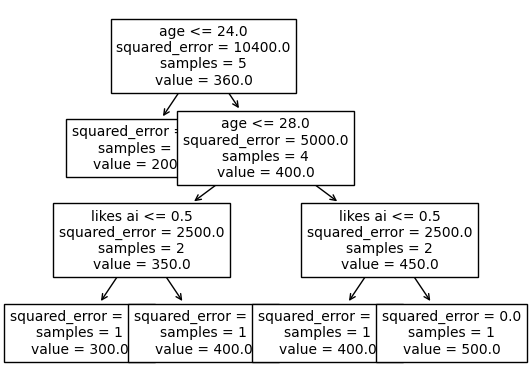

In [10]:
# Predict
x_test = np.array([[27, 0, 1]])
predicted_label = reg.predict(x_test)
predicted_label

# Visualization
from sklearn.tree import plot_tree
plot_tree(reg, feature_names=['age', 'likes english', 'likes ai'], fontsize=10)


In [12]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

from sklearn.datasets import fetch_openml
machine_cpu = fetch_openml(name='machine_cpu')
print(machine_cpu.DESCR)


**Author**:   
**Source**: Unknown -   
**Please cite**:   

The problem concerns Relative CPU Performance Data. More information can be obtained in the UCI Machine
 Learning repository (http://www.ics.uci.edu/~mlearn/MLSummary.html).
 The used attributes are :
 MYCT: machine cycle time in nanoseconds (integer)
 MMIN: minimum main memory in kilobytes (integer)
 MMAX: maximum main memory in kilobytes (integer)
 CACH: cache memory in kilobytes (integer)
 CHMIN: minimum channels in units (integer)
 CHMAX: maximum channels in units (integer)
 PRP: published relative performance (integer) (target variable)
 
 Original source: UCI machine learning repository. 
 Source: collection of regression datasets by Luis Torgo (ltorgo@ncc.up.pt) at
 http://www.ncc.up.pt/~ltorgo/Regression/DataSets.html
 Characteristics: 209 cases; 6 continuous variables

Downloaded from openml.org.


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:311: UserWarning: Multiple active versions of the dataset matching the name machine_cpu exist. Versions may be fundamentally different, returning version 1.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [15]:
x_data = machine_cpu.data
y_data = machine_cpu.target

X_train, X_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.2, random_state=7
)

reg = DecisionTreeRegressor(max_depth=1)
reg.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=1)

In [16]:
y_pred = reg.predict(X_test)
y_pred


array([ 79.53658537,  79.53658537,  79.53658537,  79.53658537,
        79.53658537,  79.53658537,  79.53658537,  79.53658537,
        79.53658537,  79.53658537,  79.53658537,  79.53658537,
        79.53658537,  79.53658537,  79.53658537,  79.53658537,
        79.53658537,  79.53658537,  79.53658537,  79.53658537,
        79.53658537,  79.53658537,  79.53658537,  79.53658537,
        79.53658537,  79.53658537,  79.53658537,  79.53658537,
        79.53658537,  79.53658537,  79.53658537,  79.53658537,
        79.53658537,  79.53658537,  79.53658537,  79.53658537,
        79.53658537, 900.33333333,  79.53658537,  79.53658537,
        79.53658537,  79.53658537])

[Text(0.5, 0.75, 'MMAX <= 48000.0\nsquared_error = 20599.053\nsamples = 167\nvalue = 94.281'),
 Text(0.25, 0.25, 'squared_error = 8065.895\nsamples = 164\nvalue = 79.537'),
 Text(0.75, 0.25, 'squared_error = 44140.222\nsamples = 3\nvalue = 900.333')]

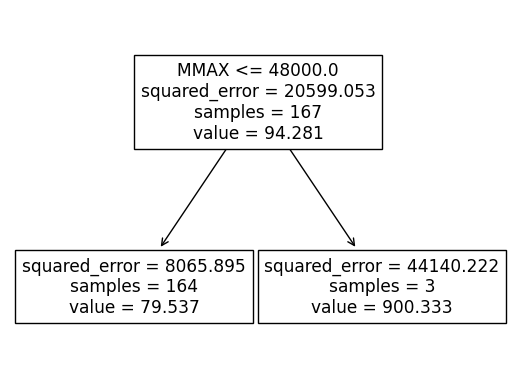

In [17]:
mean_squared_error(y_pred, y_test)

from sklearn.tree import plot_tree
plot_tree(reg, feature_names=['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX'])
